Basics of vectorized cost functions and gradients

In [78]:
import numpy as np
import matplotlib.pyplot as plt

## Cost function for linear regression

In [40]:
def compute_cost(X,y,theta):
    """Returns J, the cost of using theta as the parameter for linear regression to fit the data points in X and y"""
    # should work for single or multiple variables
    
    # number of training examples
    m=np.size(y)
    # hypothesis given current theta
    h_theta = X@theta
    # cost function
    # here the extra np.sum() is to make J return a number, not a single element array
    J = np.sum(1/(2*m)*np.transpose(h_theta-y)@(h_theta-y))
    return J

In [41]:
# test for functionality - single variable
X = np.array([[1,6.11],[1,5.53],[1,8.51]])
y = np.array([[17.6],[9.13],[13.7]])
theta = np.array([[-1],[2]])
J = compute_cost(X,y,theta)
J

7.825283333333335

In [42]:
# test for functionality - multiple variable
X = np.array([[1,.2,1],[1,-.4,-1.5],[1,.3,-.22]])
y = np.array([[400],[390],[360]])
theta = np.array([[0],[0],[0]])
J = compute_cost(X,y,theta_test)
J

73616.66666666666

## Normal equation for linear regression

In [43]:
def normal_eqn(X,y):
    """Returns the closed-form solution to linear regression using the normal equation"""
    theta = np.linalg.pinv(np.transpose(X)@X)@np.transpose(X)@y
    return theta

In [44]:
# test for functionality
normal_eqn(X,y)

array([[392.42362525],
       [-89.40936864],
       [ 25.45824847]])

## Gradient descent

In [75]:
def gradient_descent(X,y,theta,alpha,num_iters):
    """Performs gradient descent to learn theta
    theta, J_history = gradient_descent(x,y,theta,alpha,num_iters) updates theta by taking num_iters
    gradient steps with learning rate alpha; also returns J_history, the cost at each step, for tracing"""
    J_history = []
    
    # number of training examples
    m=np.size(y)
    
    for _ in np.arange(num_iters):
        # hypothesis given current theta
        h_theta = X@theta
        theta = theta - np.transpose((alpha/m)*np.transpose(h_theta-y)@X)
        
        # save the cost at each step
        J_history = np.append(J_history,compute_cost(X,y,theta))
        
    return theta, J_history

In [80]:
# test for functionality
X = np.array([[1,.2,1],[1,-.4,-1.5],[1,.3,-.22]])
y = np.array([[400],[390],[360]])
theta = np.array([[0],[0],[0]])
theta_grad, J_hist = gradient_descent(X,y,theta,0.01,100)
theta_grad

array([[239.08912585],
       [ 11.0430705 ],
       [-31.27564513]])

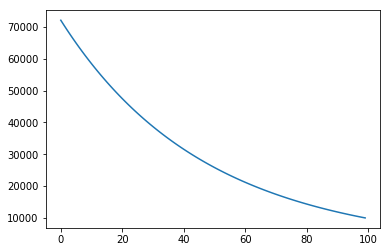

In [83]:
plt.plot(J_hist);

## Cost function for logistic regression (with regularization)

In [84]:
# First define the sigmoid function that serves as the logistic hypothesis
def sigmoid(z):
    return 1/(1+np.e**-z)    

In [85]:
# test funtionality
sigmoid(X)

array([[0.73105858, 0.549834  , 0.73105858],
       [0.73105858, 0.40131234, 0.18242552],
       [0.73105858, 0.57444252, 0.44522076]])

In [106]:
np.insert(theta[1:],0,2)

array([2, 0, 0])

In [102]:
theta[1:]

array([[0],
       [0]])

In [118]:
# Logistic cost function (with regularization)
def cost_function_reg(theta,X,y,l):
    
    # number of training examples
    m = np.size(y)
    
    # hypothesis
    h = sigmoid(X@theta)
    
    # vectorized logistic cost function
    # this is regularized for all terms except theta(0)
    J = 1/m*(-np.transpose(y)@np.log(h)-np.transpose(1-y)@np.log(1-h)) + l/(2*m)*np.transpose(theta[1:])@theta[1:]
    
    # gradient - partials of the cost function wrt each parameter
    # this is regularized for all terms except theta(0)
    grad = 1/m*np.transpose(X)@(h-y) + l/m*np.insert(theta[1:],0,0)
    
    return sum(sum(J)), grad

In [119]:
J, grad = cost_function_reg(theta,X,y,.01)
print("Cost is",J,", and gradient is",grad)

Cost is 0.693147180559966 , and gradient is [[-382.83333333 -382.83333333 -382.83333333]
 [ -10.65        -10.65        -10.65      ]
 [  87.94666667   87.94666667   87.94666667]]
